In [23]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [21]:
url ='http://www.dos.gov.jo/owa-user/owa/emp_unemp_y.show_tables1_y?lang=A&year1=2018&t_no=42'

In [64]:
def getsouptext(url):
    source = requests.get(url)
    source.encoding='windows-1256'
    return source.text

In [67]:
soup = BeautifulSoup(getsouptext(url))

In [75]:
table = soup.find('table',{'id':'myTable'})

In [87]:
data = [x.text for x in table.find_all('tr')]

In [90]:
data

['المحافظة والجنسية\nالجنس\n',
 'المجموع\nذكور\nاناث',
 'المجموع الكلي\n\n\n\n',
 '\nالنسبة\n\n    100.0\n\n    100.0\n\n    100.0\n',
 '\nالعاصمة\n\n     41.4\n\n     43.2\n\n     35.4\n',
 '\nالبلقاء\n\n      5.0\n\n      4.9\n\n      5.6\n',
 '\nالزرقاء\n\n     16.2\n\n     17.8\n\n     11.0\n',
 '\nمادبا\n\n      2.3\n\n      2.3\n\n      2.2\n',
 '\nاربد\n\n     15.8\n\n     13.8\n\n     22.2\n',
 '\nالمفرق\n\n      6.7\n\n      6.9\n\n      5.7\n',
 '\nجرش\n\n      2.9\n\n      2.6\n\n      3.9\n',
 '\nعجلون\n\n      2.0\n\n      1.5\n\n      3.4\n',
 '\nالكرك\n\n      2.8\n\n      2.5\n\n      3.7\n',
 '\nالطفيلة\n\n      1.4\n\n      0.9\n\n      3.1\n',
 '\nمعان\n\n      1.9\n\n      1.8\n\n      2.2\n',
 '\nالعقبة\n\n      1.8\n\n      1.9\n\n      1.7\n',
 'أردنيون\n\n\n\n',
 '\nالنسبة\n\n    100.0\n\n    100.0\n\n    100.0\n',
 '\nالعاصمة\n\n     38.3\n\n     40.4\n\n     33.5\n',
 '\nالبلقاء\n\n      6.0\n\n      6.1\n\n      5.7\n',
 '\nالزرقاء\n\n     14.5\n\n     16.4\n

In [98]:
for i in range(len(data)):
    data[i]=data[i].split('\n')


In [116]:
s=[]
sall=[]
for i in data:
    for j in i :
        if j !='':s.append(j)
    sall.append(s)
    s=[]
        
        

In [117]:
sall

[['المحافظة والجنسية', 'الجنس'],
 ['المجموع', 'ذكور', 'اناث'],
 ['المجموع الكلي'],
 ['النسبة', '    100.0', '    100.0', '    100.0'],
 ['العاصمة', '     41.4', '     43.2', '     35.4'],
 ['البلقاء', '      5.0', '      4.9', '      5.6'],
 ['الزرقاء', '     16.2', '     17.8', '     11.0'],
 ['مادبا', '      2.3', '      2.3', '      2.2'],
 ['اربد', '     15.8', '     13.8', '     22.2'],
 ['المفرق', '      6.7', '      6.9', '      5.7'],
 ['جرش', '      2.9', '      2.6', '      3.9'],
 ['عجلون', '      2.0', '      1.5', '      3.4'],
 ['الكرك', '      2.8', '      2.5', '      3.7'],
 ['الطفيلة', '      1.4', '      0.9', '      3.1'],
 ['معان', '      1.9', '      1.8', '      2.2'],
 ['العقبة', '      1.8', '      1.9', '      1.7'],
 ['أردنيون'],
 ['النسبة', '    100.0', '    100.0', '    100.0'],
 ['العاصمة', '     38.3', '     40.4', '     33.5'],
 ['البلقاء', '      6.0', '      6.1', '      5.7'],
 ['الزرقاء', '     14.5', '     16.4', '     10.0'],
 ['مادبا', '      3.0'

In [118]:
sall[1].insert(0,'')

In [184]:
df = pd.DataFrame(sall)
df.head()

,Gov,Sum,Male,Female
0,المحافظة والجنسية,الجنس,None,None
1,,المجموع,ذكور,اناث
2,المجموع الكلي,None,None,None
3,النسبة,100.0,100.0,100.0
4,العاصمة,41.4,43.2,35.4


In [186]:
df[0]

In [ ]:
df.columns = ['Gov','Sum','Male','Female']

In [146]:
# المجموع الكلي # أردنيون #غير الأردنيين

In [151]:
#16 #30

In [197]:
df['Nati'] = None

In [198]:
df['Nati'][0:16] = 'both'
df['Nati'][16:30] = 'jor'
df['Nati'][30:44] = 'notjor'

In [202]:
df.drop([0,1,2,3,16,17,30,31],inplace =True)

In [205]:
df.head()

,Gov,Sum,Male,Female,Nati
4,العاصمة,41.4,43.2,35.4,both
5,البلقاء,5.0,4.9,5.6,both
6,الزرقاء,16.2,17.8,11.0,both
7,مادبا,2.3,2.3,2.2,both
8,اربد,15.8,13.8,22.2,both


In [206]:
gov = pd.read_csv('gdf.csv')

In [212]:
gov.reset_index(inplace=True)

In [240]:
govindex = {v:s for s,v in zip( list(gov['index'].values) ,list(gov['CityNameAR'].values) )}
def get_gov_index(x):
    name =  'محافظة ' + x
    return govindex[name]
df['GovIndex'] = df['Gov'].apply(lambda x :get_gov_index(x) )

In [243]:
index_json = gov[['index','geoplot']]

In [244]:
index_json.head()

,index,json
0,0,"{'type': 'GeometryCollection', 'geometries': [..."
1,1,"{'type': 'GeometryCollection', 'geometries': [..."
2,2,"{'type': 'GeometryCollection', 'geometries': [..."
3,3,"{'type': 'GeometryCollection', 'geometries': [..."
4,4,"{'type': 'GeometryCollection', 'geometries': [..."


In [251]:
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt


In [407]:
finaldf = pd.merge(df,gov,left_on='GovIndex',right_on='index')

In [277]:
import json
from shapely.geometry import Polygon
import shapely
def read_json_ploy(name):
    with open('Governorate/{}.json'.format(name),'rb') as  f : 
        t =json.load(f)
    geocoor = t['geometries'][0]
    return Polygon(geocoor['coordinates'][0][0])

In [258]:
jomap=read_json_ploy('Jordan')

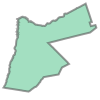

In [260]:
jomap

In [408]:
finaldf.head(1)

,Gov_x,Sum,Male_x,Female_x,Nati,GovIndex,index,CityNameEN,HouseHolds,Total,...,Cordinnate,loctype,X,Y,Gov_y,Geo,geometry,male_pct,Female_pct,json
0,العاصمة,41.4,43.2,35.4,both,0,0,Amman Governorate,956714,4430700,...,"('36.4601367', '31.6726997')",Governorate,36.460137,31.6727,Amman Governorate,"POLYGON ((35.7215731 31.7780593, 35.7221183 31...","POLYGON ((35.7215731 31.7780593, 35.7221183 31...",0.53689,0.46311,"{'type': 'GeometryCollection', 'geometries': [..."


In [411]:
#shapely.wkt.loads
finaldf['geometry'] = finaldf['geometry'].apply(lambda x : shapely.wkt.loads(x))


In [409]:
finaldf['Sum'] = finaldf['Sum'].astype(float)
finaldf['Male_x'] = finaldf['Male_x'].astype(float)
finaldf['Female_x'] = finaldf['Female_x'].astype(float)

In [412]:
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(finaldf,crs=crs, geometry=finaldf['geometry'] )

Text(0.5, 1.02, 'unemployment rate in jordan 2018')

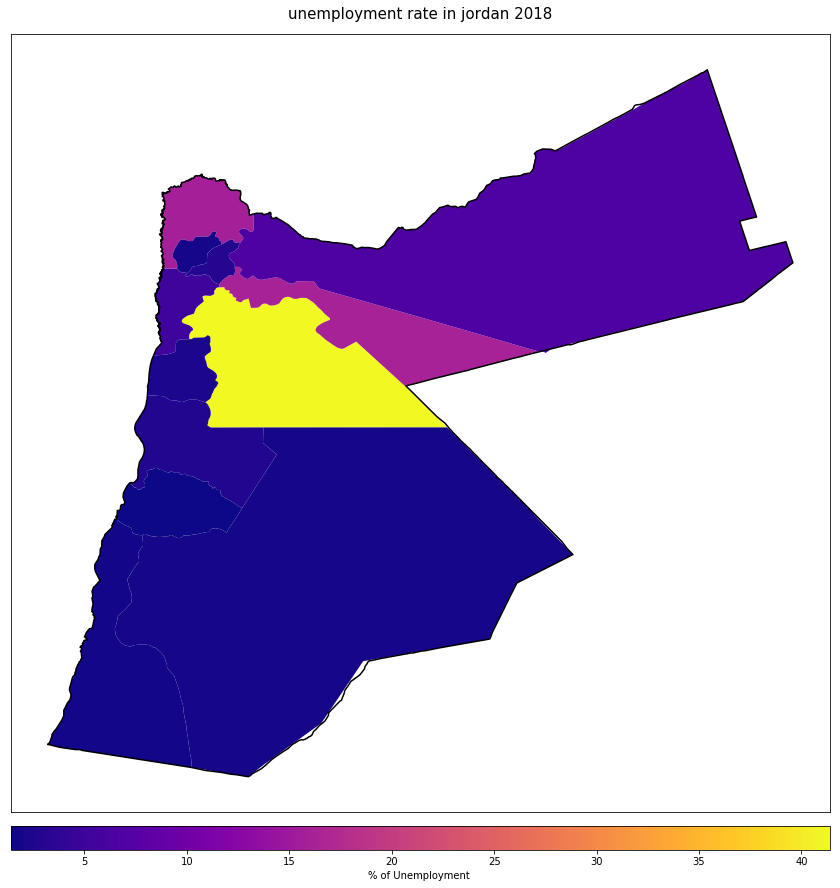

In [413]:
fig, ax = plt.subplots(1, 1,figsize=(20,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.2)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(*jomap.exterior.xy,'black')

gdf[gdf['Nati']=='both'].plot(column='Sum', ax=ax, legend=True, cax=cax,cmap = 'plasma',
                              legend_kwds={'label': "% of Unemployment ",'orientation': "horizontal" })

title = 'unemployment rate in jordan 2018'
plt.text(0.5, 1.02, title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

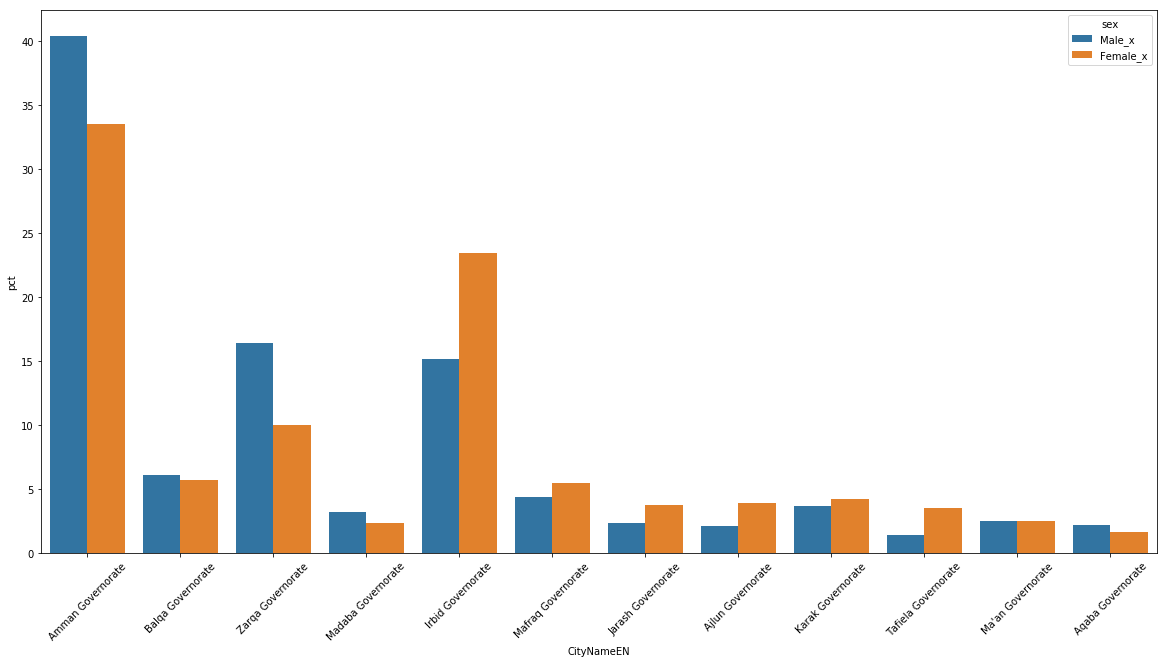

In [415]:
import seaborn as sns
seboarndf = gdf[gdf['Nati']=='jor'][['CityNameEN','Male_x','Female_x']]
seboarndf = pd.melt(seboarndf, id_vars="CityNameEN", var_name="sex", value_name="pct")
plt.figure(figsize=(20,10))
g = sns.barplot(data = seboarndf , x ='CityNameEN',y='pct',hue='sex')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

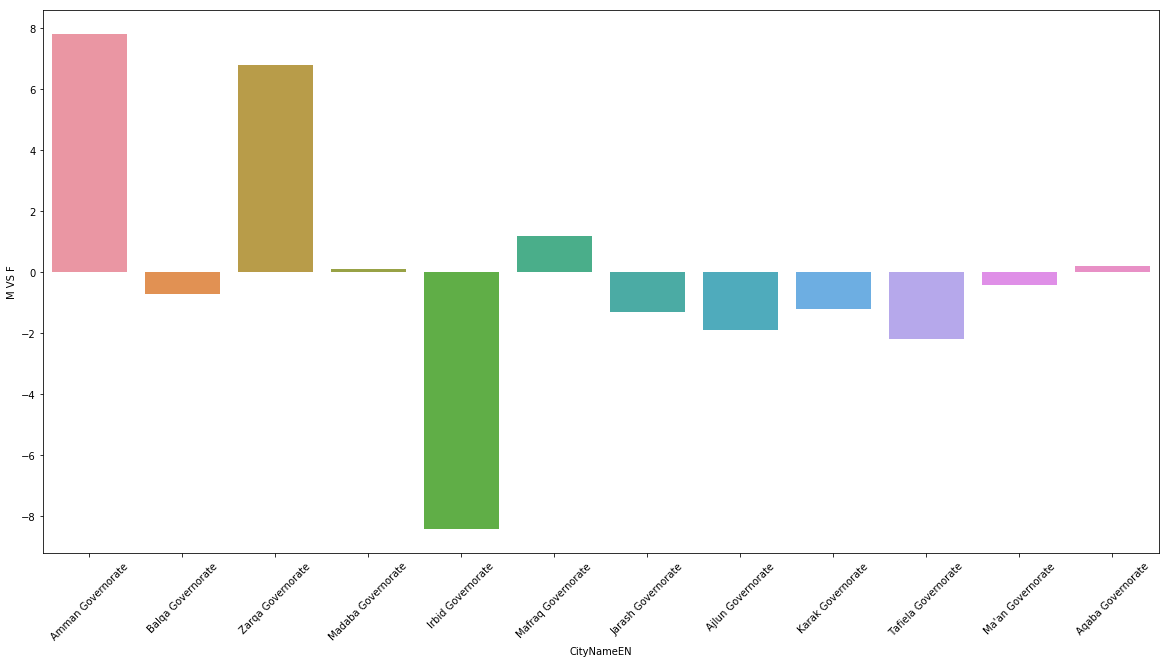

In [421]:
gdf['M VS F'] = gdf['Male_x'] - gdf['Female_x']
plt.figure(figsize=(20,10))
ax = sns.barplot(data = gdf[gdf['Nati']=='both'] , x = 'CityNameEN' , y='M VS F', dodge=False)
plt.xticks(rotation=45)

In [ ]:
# population 

Text(0.5, 1.02, 'House Holds 2018')

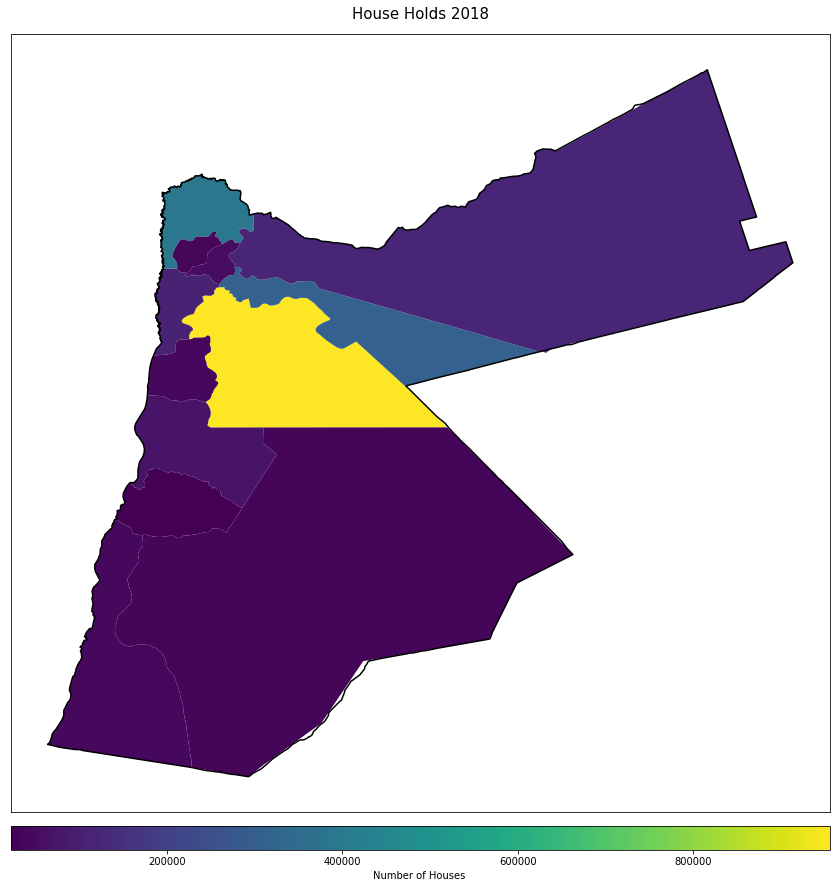

In [422]:
fig, ax = plt.subplots(1, 1,figsize=(20,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.2)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(*jomap.exterior.xy,'black')

gdf[gdf['Nati']=='both'].plot(column='HouseHolds', ax=ax, legend=True, cax=cax,cmap = 'viridis'
                             ,legend_kwds={'label': "Number of Houses ",'orientation': "horizontal" })


title = 'House Holds 2018'
plt.text(0.5, 1.02, title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

Text(0.5, 1.02, 'population in jordan')

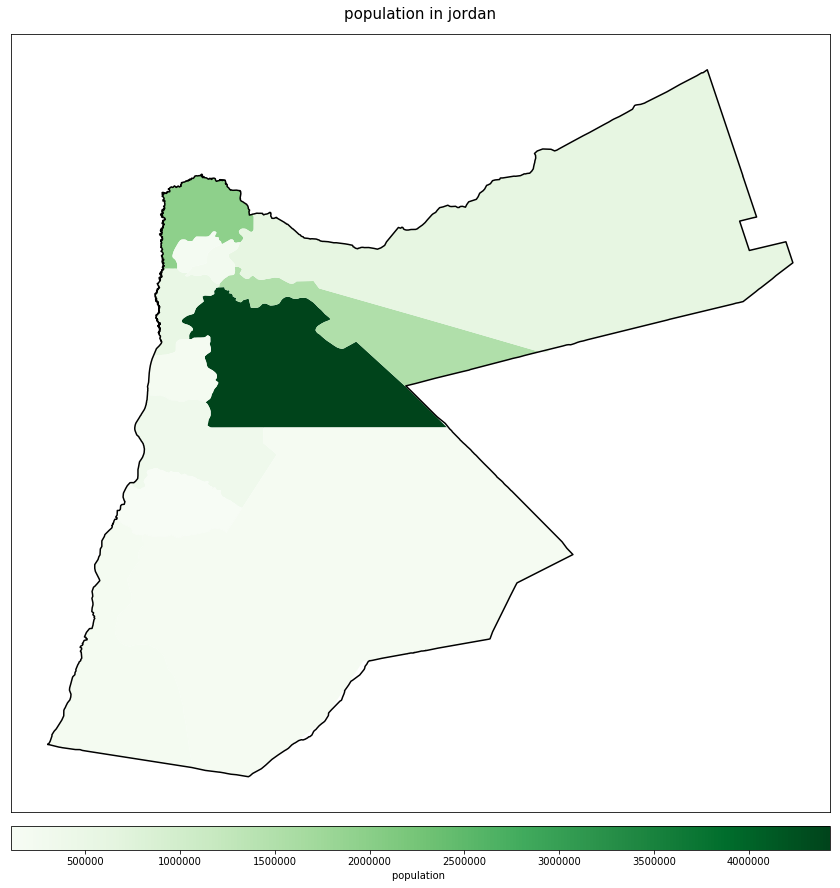

In [427]:
fig, ax = plt.subplots(1, 1,figsize=(20,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.2)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(*jomap.exterior.xy,'black')

gdf[gdf['Nati']=='jor'].plot(column='Total', ax=ax, legend=True, cax=cax,cmap = 'Greens'
                             ,legend_kwds={'label': "population ",'orientation': "horizontal" })


title = 'population in jordan'
plt.text(0.5, 1.02, title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

In [428]:
 # ashraf alroumi -- > ashrafalroomi5@gmail.com